<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself. We will NOT grade this submissing w/o all the information<br>
<b>Name</b>: Shengtao Lin<br>
<b>NetID</b>: sl1377<br>
<b>Recitation (01)</b>: 1<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>:  SL    


<h3>Grader Notes</h3>
<b>Your Grade<b>:50<br>
<b>Grader Initials</b>:LL<br>
<b>Grader Comments</b> (optional):<br>
</div>

## CS 439 - Introduction to Data Science
### Fall 2019

# Lab 3: Data Cleaning and Visualization

### Due Date: Tuesday October 1, 2019 by 11:59 PM ###

### Instructions
This lab is presented as a notebook. Please execute the cells that are already completed and your task is to fill in the code
between ### BEGIN SOLUTION ### and ### END SOLUTION ###. 

#### Important: Please do not add any new cells or change the order of cells. If you have questions, please contact the courseS staff.

In this lab, you will be working with a dataset from NYPD containing data on calls to the New York Police Department. Information about the datasets can be found https://opendata.cityofnewyork.us/

## Setup

Note that after activating matplotlib to display figures inline via the IPython magic `%matplotlib inline`, we configure a custom default figure size. Virtually every default aspect of matplotlib [can be customized](https://matplotlib.org/users/customizing.html).

In [271]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

# Part 1:Getting Data

We will work with the NYPD Historic complaint data set. Our first task is to estimate the size of this download by looking at the number of rows, columns and using an estimated size for a column (use a reasonable value). The site metadata is available from the page
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [ ]:
### BEGIN SOLUTION
estimated size of the download (based on metadata information from the site) = 4114500000 bytes   
# please explain how you reached the answer

#one row containing 35 columns, 10 doubles which is 10*8 bytes, 3 date&time which is 3*8 bytes,
#1 point which is 4 bytes, all 21 strings are short so I assume average is about 25 characters 21*25 bytes
#There is total 6.5M rows
#There fore 633*6.5M = 4114500000 bytes

### END SOLUTION

### 1.1 Download the data
This file is large (use the estimate you did above). If it takes too long to download, you may want to interrupt and download the file using a browser and URL https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [3]:
import utils
data_dir = 'data'
data_url = 'https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i'

file_name = 'NYPD_Complaint_Data_Historic.csv'

# To retrieve the dataset, we will use the `utils.fetch_and_cache` utility from utils library. 
dest_path = utils.fetch_and_cache(data_url=data_url, file=file_name,data_dir=data_dir)
print(f'Located at {dest_path}')

KeyboardInterrupt: 

### 1.2 Inspect the size of the file
It is helpful to get an idea of the size of the file. This can be done using functions in the utils library.

In [12]:
# look at the size of the file w/o opening it using OS (https://docs.python.org/3/library/os.html). You can perform
# variety of operating system related functions from this package.
### BEGIN SOLUTION
import os

info=os.stat('data/NYPD_Complaint_Data_Historic.csv')
print(info.st_size)

#### END SOLUTION

2052178815


### 1.3 Split the large file
This data file NYPD_Complaint_Data_Historic.csv is too big to load into a single DataFrame. Let us split the large file into smaller files.  Let us find out the number of lines in the NYPD_Complaint_Data_Historic.csv file using utils.

In [14]:
# Using utils library, find the number of lines in the file

### BEGIN SOLUTION
linecount=utils.line_count('data/NYPD_Complaint_Data_Historic.csv')
print(linecount)


### END SOLUTION

6500871


In [19]:
# Split the file into 10 smaller files. Estimate the number of lines in each file using the count above
# files should be created in the data folder and named NYPD_Complaint_Data_Historic_1.csv, 
# NYPD_Complaint_Data_Historic_2.csv, ... NYPD_Complaint_Data_Historic_10.csv etc
# It is possible that few lines from the original file may not be saved due to rounding errors.

### BEGIN SOLUTION

import csv
import sys

origin_file='data/NYPD_Complaint_Data_Historic'
origin_file_addr='data/NYPD_Complaint_Data_Historic.csv'
name=open(origin_file_addr,'r').readlines()
line_each=int(linecount/10)+1
num=1

for line in range(len(name)):
    if line % line_each ==0:
        open(str(origin_file)+'_'+str(num)+'.csv' , 'w+' ).writelines(name[line:line+line_each])
        num+=1
        




### END SOLUTION

### 1.4 Check the files in the data folder
Now, we'll use a method of the `Pathlib.Path` class called `glob` to list all files in the `data` directory. You will find useful information in pathlib [docs](https://docs.python.org/3/library/pathlib.html).

Below, we use pathlib's `glob` method to store the list of all files' names from the `data_dir` directory in the variable `file_names`. These names should be strings that contain only the file name (e.g. `dummy.txt` not `data/dummy.txt`). The asterisk (*) character is used with the `glob` method to match any string.

In [20]:
from pathlib import Path
data_dir_path = Path('data') # creates a Path object that points to the data directory
file_names = [x.name for x in data_dir_path.glob('*') if x.is_file()]
file_names

['NYPD_Complaint_Data_Historic_10.csv',
 '.DS_Store',
 'NYPD_Complaint_Data_Historic_7.csv',
 'NYPD_Complaint_Data_Historic_6.csv',
 'NYPD_Complaint_Data_Historic.csv',
 'NYPD_Complaint_Data_Historic_4.csv',
 'NYPD_Complaint_Data_Historic_5.csv',
 'NYPD_Complaint_Data_Historic_1.csv',
 'NYPD_Complaint_Data_Historic_2.csv',
 'NYPD_Complaint_Data_Historic_3.csv',
 'NYPD_Complaint_Data_Historic_8.csv',
 'NYPD_Complaint_Data_Historic_9.csv']

### 1.5 Pre-processing of data
It is good to pre-process the data to see if the file can be opened in a Jupyter notebook. We need to avoid large files that can crash notebooks. Typically, files of size around 200 MB is ok to open into a DataFrame. In the following activities we will inspect the file w/o opening it as a DataFrame. Using utils.head 

In [21]:
# Use the util.head() to read up to 5 lines from the original file (w/o opening it)
from utils import head
head('data/NYPD_Complaint_Data_Historic.csv')

['CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX\n',
 '755675227,12/31/2018,14:30:00,,,1,12/31/2018,341,PETIT LARCENY,339,"LARCENY,PETIT FROM OPEN AREAS,",COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,OTHER,N.Y. POLICE DEPT,0,,,,980870,194864,,,,,40.701541003000045,-74.01219153799997,"(40.701541003, -74.012191538)",PATROL BORO MAN SOUTH,,25-44,WHITE HISPANIC,M\n',
 '269572163,12/31/2018,02:15:00,12/31/2018,02:20:00,106,12/31/2018,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,COMPLETED,MISDEMEANOR,QUEENS,,STREET,N.Y. POLICE DEPT,0,,,,1034936,185551,25-44,ASIAN / PACIFIC ISLANDER,M,,40.675834499000075,-73.81727088499997,"(40.675834499, -73.817270885)

### 1.6 Inspecting and describing data columns
There should be 35 columns in each record. Using header information and data types, describe the type of data in each
column. If you are unable to determine, just state so.
##### BEGIN SOLUTION
* CMPLNT_NUM : Nominal
* CMPLNT_FR_DT: interval
* CMPLNT_FR_TM: interval
* CMPLNT_TO_DT: interval 
* CMPLNT_TO_TM: interval
* ADDR_PCT_CD: Nominal
* RPT_DT: interval
* KY_CD: Nominal
* OFNS_DESC: Nominal
* PD_CD: Nominal
* PD_DESC: Nominal
* CRM_ATPT_CPTD_CD: Ordinal
* LAW_CAT_CD: Ordinal
* BORO_NM: Nominal
* LOC_OF_OCCUR_DESC: Nominal
* PREM_TYP_DESC: Nominal
* JURIS_DESC: Nominal
* JURISDICTION_CODE: cannot determine
* PARKS_NM: cannot determine
* HADEVELOPT: cannot determine
* HOUSING_PSA: cannot determine
* X_COORD_CD: Nominal
* Y_COORD_CD: Nominal
* SUSP_AGE_GROUP: Ordinal
* SUSP_RACE: Nominal
* SUSP_SEX: Nominal
* TRANSIT_DISTRICT: cannot determine
* Latitude: Nominal
* Longitude: Nominal
* Lat_Lon: Nominal
* PATROL_BORO: Nominal
* STATION_NAME: Nominal
* VIC_AGE_GROUP: Ordinal
* VIC_RACE: Nominal
* VIC_SEX: Nominal
##### END SOLUTION

# Part 2 - Exploratory Data Analysis
Exploratory data analysis (EDA) is the process of examining a subest of a large data set to see what we can know about the data. First we will explore one file NYPD_Complaint_Data_Historic_1.csv to see what we can find out.

### 2.1 Loading Data into a DataFrame
Load the first CSV file, NYPD_Complaint_Data_Historic_1.csv into a `pandas.DataFrame` object. Also do a time analysis to see how long it took to load the data into a DataFrame. Time should be printed in seconds. The time libraries https://docs.python.org/3/library/time.html can help.

In [307]:
### BEGIN SOLUTION
import pandas as pd
import time

start=time.time()
calls = pd.read_csv("data/NYPD_Complaint_Data_Historic_1.csv")
end=time.time()
time_used=end-start
calls.head()
print(time_used)




### END SOLUTION

4.433408975601196


### 2.2 Description of Fields
Let's also check some basic information about these files using the `DataFrame.describe` and `DataFrame.info` methods. Describe columns that can be removed based on the information.

In [308]:
### BEGIN SOLUTION
calls.info()
calls.describe()

# What columns can be removed from the DataFrame? A reasonable rule of thumb is that if a column is missing more than 
# 50% of the data then it should be removed

### END SOLUTION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650087 entries, 0 to 650086
Data columns (total 35 columns):
CMPLNT_NUM           650087 non-null int64
CMPLNT_FR_DT         650087 non-null object
CMPLNT_FR_TM         650087 non-null object
CMPLNT_TO_DT         556887 non-null object
CMPLNT_TO_TM         557231 non-null object
ADDR_PCT_CD          650084 non-null float64
RPT_DT               650087 non-null object
KY_CD                650087 non-null int64
OFNS_DESC            650079 non-null object
PD_CD                649686 non-null float64
PD_DESC              649686 non-null object
CRM_ATPT_CPTD_CD     650087 non-null object
LAW_CAT_CD           650087 non-null object
BORO_NM              649681 non-null object
LOC_OF_OCCUR_DESC    528553 non-null object
PREM_TYP_DESC        647405 non-null object
JURIS_DESC           650087 non-null object
JURISDICTION_CODE    649686 non-null float64
PARKS_NM             5808 non-null object
HADEVELOPT           31662 non-null object
HOUSING_PSA

CMPLNT_NUM    ADDR_PCT_CD          KY_CD          PD_CD  \
count  6.500870e+05  650084.000000  650087.000000  649686.000000   
mean   5.502388e+08      62.685838     305.113086     405.598808   
std    2.596753e+08      34.559990     154.470514     218.267294   
min    1.000001e+08       1.000000     101.000000     101.000000   
25%    3.252679e+08      40.000000     118.000000     254.000000   
50%    5.503907e+08      62.000000     341.000000     343.000000   
75%    7.751989e+08      90.000000     351.000000     638.000000   
max    9.999956e+08     123.000000     678.000000     922.000000   

       JURISDICTION_CODE    X_COORD_CD     Y_COORD_CD  TRANSIT_DISTRICT  \
count      649686.000000  6.500380e+05  650038.000000      16680.000000   
mean            0.986543  1.004768e+06  207493.703725         13.115468   
std             8.448666  2.127185e+04   30311.765913         12.375337   
min             0.000000  9.135120e+05  121174.000000          1.000000   
25%             0.000000  9.915040e+05  184724.000000          3.000000   
50%             0.000000  1.004219e+06  206762.000000          4.000000   
75%             0.000000  1.016453e+06  235173.000000         30.000000   
max            97.000000  1.067226e+06  271820.000000         34.000000   

            Latitude      Longitude  
count  650038.000000  650038.000000  
mean       40.736157     -73.925933  
std         0.083202       0.076716  
min        40.499025     -74.254377  
25%        40.673622     -73.973832  
50%        40.734119     -73.927972  
75%        40.812153     -73.883720  
max        40.912723     -73.700568

### 2.2 Finding Uniques

Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we still need more information about what each column represents. Let's explore the data further.

find the number of unique values in each DataFrame column and answer the questions below.

In [309]:
### BEGIN SOLUTION
calls.nunique()

# Questions
# 1. How many distinct locations where the complaints have come from? 5
# 2. How many age groups are represented in the data set? 40
# 3. How many boroughs are included in the data set? 5
# 4. How many offense types are listed in this data set? 66

### END SOLUTION

CMPLNT_NUM           650042
CMPLNT_FR_DT            518
CMPLNT_FR_TM           1440
CMPLNT_TO_DT            522
CMPLNT_TO_TM           1440
ADDR_PCT_CD              77
RPT_DT                  518
KY_CD                    66
OFNS_DESC                61
PD_CD                   360
PD_DESC                 350
CRM_ATPT_CPTD_CD          2
LAW_CAT_CD                3
BORO_NM                   5
LOC_OF_OCCUR_DESC         5
PREM_TYP_DESC            72
JURIS_DESC               19
JURISDICTION_CODE        19
PARKS_NM                741
HADEVELOPT              264
HOUSING_PSA             477
X_COORD_CD            52198
Y_COORD_CD            55451
SUSP_AGE_GROUP           40
SUSP_RACE                 7
SUSP_SEX                  3
TRANSIT_DISTRICT         12
Latitude             119314
Longitude            117217
Lat_Lon               76907
PATROL_BORO               8
STATION_NAME            367
VIC_AGE_GROUP            54
VIC_RACE                  7
VIC_SEX                   5
dtype: int64

### 2.3 Offense by Boro
Using GroupBy operation, create a DataFrame that groups offenses by Boro. call the DataFrame calls_by_Boro_and_offense

In [310]:
### BEGIN SOLUTION

#calls_by_Boro_and_offense=calls.groupby(['BORO_NM','KY_CD']).size()
calls_by_Boro_and_offense=calls.groupby(['BORO_NM','OFNS_DESC']).size()
calls_by_Boro_and_offense
### END SOLUTION

BORO_NM        OFNS_DESC                           
BRONX          ABORTION                                    1
               ADMINISTRATIVE CODE                       388
               AGRICULTURE & MRKTS LAW-UNCLASSIFIED       59
               ALCOHOLIC BEVERAGE CONTROL LAW             56
               ANTICIPATORY OFFENSES                       1
               ARSON                                     293
               ASSAULT 3 & RELATED OFFENSES            19840
               BURGLAR'S TOOLS                            48
               BURGLARY                                 3243
               CHILD ABANDONMENT/NON SUPPORT              10
               CRIMINAL MISCHIEF & RELATED OF          14724
               CRIMINAL TRESPASS                         760
               DANGEROUS DRUGS                          8320
               DANGEROUS WEAPONS                        3097
               DISORDERLY CONDUCT                          8
               ENDAN WELFARE INCO

### 2.4 Offenses in Bronx

In the cell below, find a list of strings corresponding to the possible values for `OFNS_DESC` when `BORO` is "BRONX". Create an expression that automatically extracts the names of the offenses.

In [311]:
### BEGIN SOLUTION
BRONX_OFNS=list(calls_by_Boro_and_offense['BRONX'].index)
print(BRONX_OFNS)
### END SOLUTION

#len(BRONX_OFNS)
# How many offenses were committed in Bronx during the analysis period? 55

['ABORTION', 'ADMINISTRATIVE CODE', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED', 'ALCOHOLIC BEVERAGE CONTROL LAW', 'ANTICIPATORY OFFENSES', 'ARSON', 'ASSAULT 3 & RELATED OFFENSES', "BURGLAR'S TOOLS", 'BURGLARY', 'CHILD ABANDONMENT/NON SUPPORT', 'CRIMINAL MISCHIEF & RELATED OF', 'CRIMINAL TRESPASS', 'DANGEROUS DRUGS', 'DANGEROUS WEAPONS', 'DISORDERLY CONDUCT', 'ENDAN WELFARE INCOMP', 'ESCAPE 3', 'FELONY ASSAULT', 'FORGERY', 'FRAUDS', 'FRAUDULENT ACCOSTING', 'GAMBLING', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 'HARRASSMENT 2', 'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'INTOXICATED & IMPAIRED DRIVING', 'INTOXICATED/IMPAIRED DRIVING', 'JOSTLING', 'KIDNAPPING', 'KIDNAPPING & RELATED OFFENSES', 'MISCELLANEOUS PENAL LAW', 'NYS LAWS-UNCLASSIFIED FELONY', 'NYS LAWS-UNCLASSIFIED VIOLATION', 'OFF. AGNST PUB ORD SENSBLTY &', 'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST PUBLIC SAFETY', 'OFFENSES AGAINST THE PERSON', 'OFFENSES INVOLVING FRAUD', 'OFFENSES RELATED TO CHILDREN', 'OTHER OFFENSES REL

### 2.5 Most Common Crimes in NYC

What are the five crime types of OFNS_DESC that have the most crime events in Bronx? You may need to use `value_counts` to find the answer. Save your results as a list of strings.

**Hint:** *The `keys` method of the Series class might be useful.*

In [312]:
### BEGIN SOLUTION
Five_Top_Ofns=list(calls[calls['BORO_NM']=='BRONX']['OFNS_DESC'].value_counts().head(5).keys())
print(Five_Top_Ofns)
### END SOLUTION

['HARRASSMENT 2', 'PETIT LARCENY', 'ASSAULT 3 & RELATED OFFENSES', 'CRIMINAL MISCHIEF & RELATED OF', 'GRAND LARCENY']


### 2.6 Probability of a Crime in Bronx
What is the probability that a the crime "Arson" can happen in Bronx?

In [313]:
### BEGIN SOLUTION
num_Arson=calls_by_Boro_and_offense['BRONX']['ARSON']
num_Bronx=sum(list(calls_by_Boro_and_offense['BRONX']))
possbility=num_Arson/num_Bronx
print(possbility)

### END SOLUTION

0.0020612319554267383


---
# Part 3: Visualizing the Data

## Pandas vs. Seaborn Plotting

Pandas offers basic functionality for plotting. For example, the `DataFrame` and `Series` classes both have a `plot` method. However, the basic plots generated by pandas are not particularly pretty. While it's possible to manually use matplotlib commands to make pandas plots look better, we'll instead use a high level plotting library called Seaborn that will take care of most of this for us.

As you learn to do data visualization, you may find the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) and [Seaborn documentation](https://seaborn.pydata.org/api.html) helpful!

### 3.1 Plotting a Series
Using the built-in plotting functionality of pandas, such as `plot` method of the `Series` class to generate a `barh` plot type,  display the value counts for `OFNS_DESC` visually as a barh chart.

Text(0.5, 1.0, 'Number of calls by offensive type')

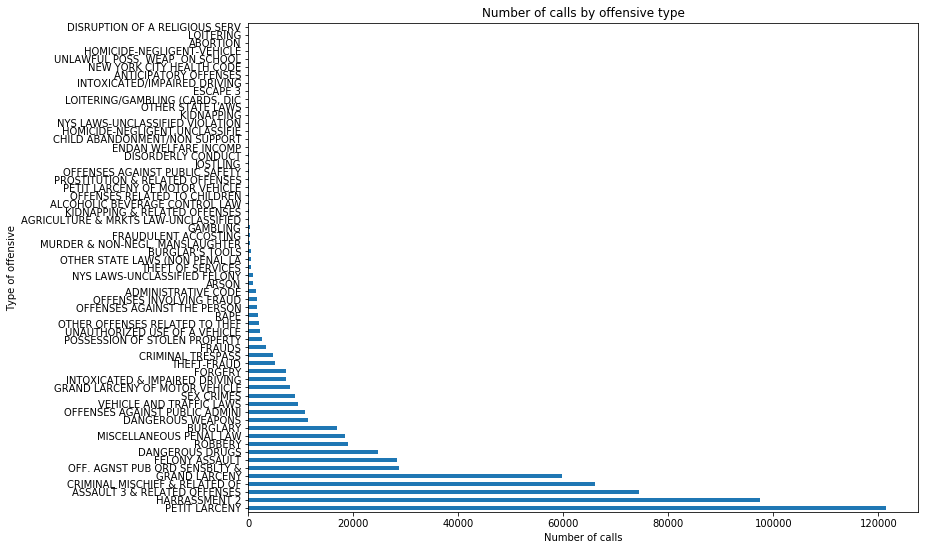

In [314]:
### BEGIN SOLUTION
ax=calls['OFNS_DESC'].value_counts().plot(kind='barh')
ax.set_xlabel('Number of calls')
ax.set_ylabel('Type of offensive')
ax.set_title('Number of calls by offensive type')

### END SOLUTION

### 3.2 Getting a Better Plot
The plot above can be messy as it plots all offenses. Plot only the offenses that has more than 10000 calls

Text(0.5, 1.0, 'Number of calls by offensive type')

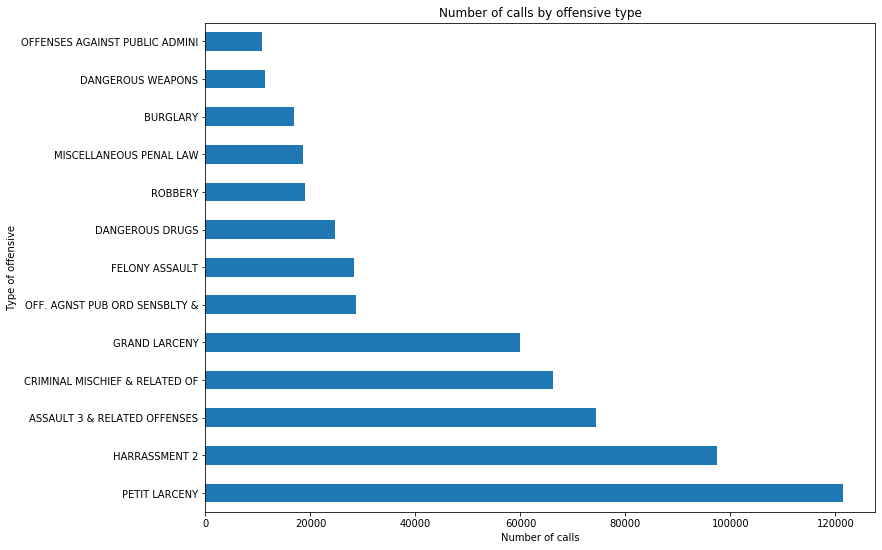

In [315]:
### BEGIN SOLUTION
clean=calls['OFNS_DESC'].value_counts()
clean=clean[clean>10000]
ax=clean.plot(kind='barh')
ax.set_xlabel('Number of calls')
ax.set_ylabel('Type of offensive')
ax.set_title('Number of calls by offensive type')

### END SOLUTION

By contrast, the Seaborn library provides a specific function `countplot` built for plotting counts. It operates directly on the DataFrame itself i.e. there's no need to call `value_counts()` at all. This higher level approach makes it easier to work with. Use the y-label ("Crime Category"), x-label("Number of Calls") and title_of_plot("Number of Calls By Crime Type"

Text(0.5, 1.0, 'Number of Calls By Crime Type')

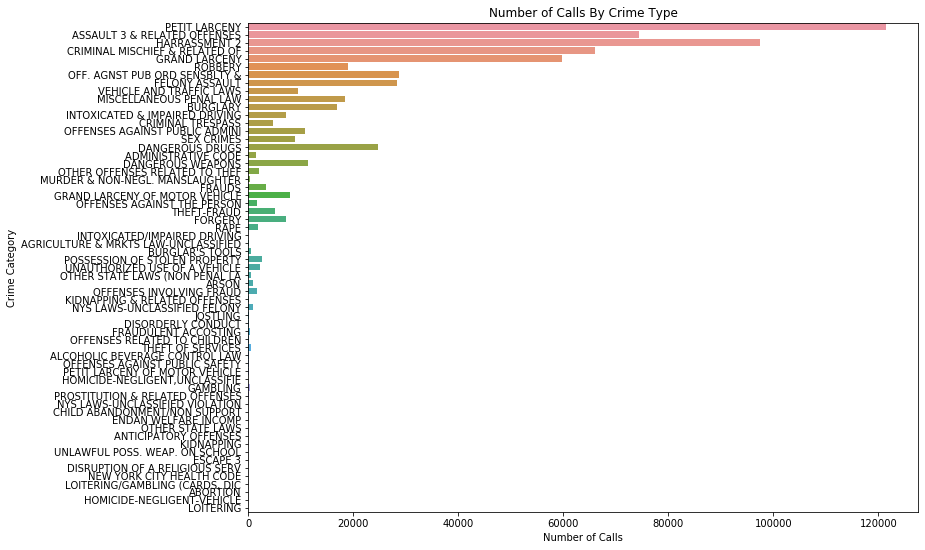

In [316]:
### BEGIN SOLUTION
ax=sns.countplot(data=calls,y='OFNS_DESC')
ax.set_xlabel('Number of Calls')
ax.set_ylabel('Crime Category')
ax.set_title('Number of Calls By Crime Type')

### END SOLUTION

You may note that the ordering might be different for the seaborn plot (as compared to pandas plot). If we want the same ordering that we had in the pandas plot, we can use the order parameter of the `countplot` method. It takes a list of strings corresponding to the axis to be ordered. By passing the index of the `value_counts`, you can get the order you want.

Text(0.5, 1.0, 'Number of Calls By Crime Type')

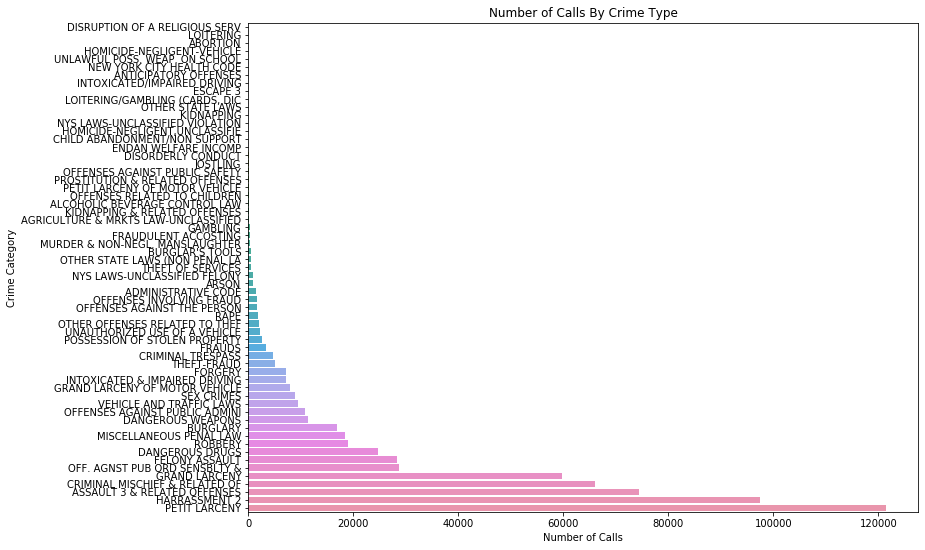

In [317]:
### BEGIN SOLUTION
ax=sns.countplot(data=calls,y='OFNS_DESC',order=calls['OFNS_DESC'].value_counts(ascending=True).index)
ax.set_xlabel('Number of Calls')
ax.set_ylabel('Crime Category')
ax.set_title('Number of Calls By Crime Type')
### END SOLUTION

Now we have a pretty bar plot with the bars ordered by size. Though `seaborn` appears to provide a superior plot from a aesthetic point of view, the `pandas` plotting library is also good to understand. You'll get practice using both libraries in the following questions.

## An Additional Note on Plotting in Jupyter Notebooks

You may have noticed that many of our code cells involving plotting end with a semicolon (;). This prevents any extra output from the last line of the cell that we may not want to see. Try adding this to your own code in the following questions!

### 3.3 making more plots

Now it is your turn to make some more plots using `pandas` and `seaborn`. Let's start by looking at the distribution of calls over days of the week.

The CMPLNT_FR_DT field contains the date of the event. We would like to add a new column to the DataFrame that includes Day of the week (DAY_OF_WEEK) that indicates the day of the week. This can help us analyze the crimes on a specific day of the week. For example, we can answer questions such as "what day of the week that a LARSON is likely to happen in NYC?"


Add a new column `DAY_OF_WEEK` into the `calls` dataframe that has the day string (eg. 'Sunday') for the corresponding value in CMPLNT_FR_DT. For example, if the first 3 values of `CMPLNT_FR_DT` are `['01/27/2006, '01/28/2006, '01/29/2006]`, then the first 3 values of the `DAY_OF_WEEK` column should be `["Friday", "Saturday", "Sunday"]`.

**Hint:** *Try using the [Series.map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) function on `calls["OFNS_DESC"]`.  Can you assign this to the new column `calls["DAY_OF_WEEK"]`?*

In [318]:
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
### BEGIN SOLUTION
import datetime
daylist=[]
for i in range(calls.shape[0]):
    day=calls.loc[i,'CMPLNT_FR_DT']
    m, d, y = (int(x) for x in day.split('/'))
    daylist.append(datetime.date(y,m,d).weekday())
calls['weekday']=daylist
day_indices = range(7)
indices_to_days_dict = dict(zip(day_indices, days))
calls["DAY_OF_WEEK"] = calls["weekday"].map(indices_to_days_dict)
calls=calls.drop(['weekday'],axis=1)
calls.head(50)
    
### END SOLUTION

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0    755675227   12/31/2018     14:30:00          NaN          NaN   
1    269572163   12/31/2018     02:15:00   12/31/2018     02:20:00   
2    502875936   12/31/2018     15:10:00   12/31/2018     15:30:00   
3    384910394   12/31/2018     08:25:00   12/31/2018     08:30:00   
4    802820685   12/31/2018     06:50:00   12/31/2018     06:55:00   
5    275845001   12/31/2018     02:00:00   12/31/2018     02:26:00   
6    630221491   12/31/2018     01:00:00   12/31/2018     08:45:00   
7    992676316   12/31/2018     09:00:00   12/31/2018     09:32:00   
8    138340562   12/31/2018     09:30:00   12/31/2018     09:40:00   
9    699050675   12/31/2018     02:00:00   12/31/2018     02:30:00   
10   823583576   12/31/2018     19:30:00   12/31/2018     19:35:00   
11   408208561   12/31/2018     07:45:00   12/31/2018     07:50:00   
12   555675097   12/31/2018     14:20:00          NaN          NaN   
13   576233512   12/31/2018     10:00:00   12/31/2018     11:00:00   
14   372978689   12/31/2018     10:00:00   12/31/2018     10:23:00   
15   648093466   12/31/2018     02:00:00   12/31/2018     02:05:00   
16   609663100   12/31/2018     21:05:00   12/31/2018     21:06:00   
17   457019741   12/31/2018     00:01:00          NaN          NaN   
18   257812311   12/31/2018     01:45:00   12/31/2018     01:50:00   
19   291285490   12/31/2018     00:00:00   12/31/2018     08:00:00   
20   376421390   12/31/2018     08:30:00   12/31/2018     08:40:00   
21   226694995   12/31/2018     11:00:00   12/31/2018     12:15:00   
22   751053472   12/31/2018     14:00:00   12/31/2018     14:10:00   
23   563204086   12/31/2018     20:10:00          NaN          NaN   
24   833988410   12/31/2018     13:50:00   12/31/2018     13:55:00   
25   918700254   12/31/2018     02:15:00   12/31/2018     02:20:00   
26   401665358   12/31/2018     19:18:00          NaN          NaN   
27   936242275   12/31/2018     00:05:00   12/31/2018     00:10:00   
28   854031512   12/31/2018     14:35:00   12/31/2018     14:40:00   
29   482529486   12/31/2018     02:30:00          NaN          NaN   
30   719974762   12/31/2018     00:45:00   12/31/2018     00:51:00   
31   702321327   12/31/2018     00:00:00   12/31/2018     00:20:00   
32   616165167   12/31/2018     22:00:00   12/31/2018     22:30:00   
33   612305910   12/31/2018     09:30:00   12/31/2018     10:50:00   
34   980532566   12/31/2018     22:13:00   12/31/2018     22:15:00   
35   866980625   12/31/2018     03:00:00   12/31/2018     06:00:00   
36   765880908   12/31/2018     16:40:00   12/31/2018     16:50:00   
37   822264298   12/31/2018     13:52:00   12/31/2018     13:56:00   
38   121537989   12/31/2018     08:20:00          NaN          NaN   
39   226812896   12/31/2018     13:40:00   12/31/2018     13:45:00   
40   281550300   12/31/2018     13:00:00   12/31/2018     14:30:00   
41   637202108   12/31/2018     22:30:00   12/31/2018     23:40:00   
42   965796388   12/31/2018     00:15:00   12/31/2018     00:18:00   
43   431577519   12/31/2018     13:00:00   12/31/2018     13:05:00   
44   207960643   12/31/2018     09:35:00   12/31/2018     10:30:00   
45   242743872   12/31/2018     09:30:00   12/31/2018     21:00:00   
46   471448148   12/31/2018     08:45:00   12/31/2018     12:40:00   
47   175472000   12/31/2018     12:00:00   12/31/2018     12:30:00   
48   221882743   12/31/2018     12:50:00   12/31/2018     12:55:00   
49   211590056   12/31/2018     20:00:00   12/31/2018     20:30:00   

    ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  PD_CD  \
0           1.0  12/31/2018    341                   PETIT LARCENY  339.0   
1         106.0  12/31/2018    344    ASSAULT 3 & RELATED OFFENSES  101.0   
2         121.0  12/31/2018    578                   HARRASSMENT 2  638.0   
3          68.0  12/31/2018    578                   HARRASSMENT 2  638.0   
4          24.0  12/31/2018    341              

### 3.4 Seaborn plots

Create a `seaborn` plot that shows the number of calls for each day of the week. You may want to use of the `rotation` argument in `ax.set_xticklabels`, which rotates the labels by 90 degrees.

In [319]:
### BEGIN SOLUTION
ax=sns.countplot(data=calls,x='DAY_OF_WEEK',order=days)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('Number of Calls')
ax.set_xlabel('Day of Week')
ax.set_title('Number of Calls by Each Day of the Week')

### END SOLUTION

Text(0.5, 1.0, 'Number of Calls by Each Day of the Week')

Now, let's make the same plot using `pandas`. Construct a vertical bar plot with the count of the number of calls (entries in the table) for each day of the week **ordered by the day of the week** (eg. `Sunday`, `Monday`, ...). Do not use `sns` for this plot. Be sure that your axes are labeled and that your plot is titled.

**Hint:** *Given a series `s`, and an array `coolIndex` that has the same entries as in `s.index`, `s[coolIndex]` will return a copy of the series in the same order as `coolIndex`.*

Text(0.5, 1.0, 'Number of Calls by Each Day of the Week')

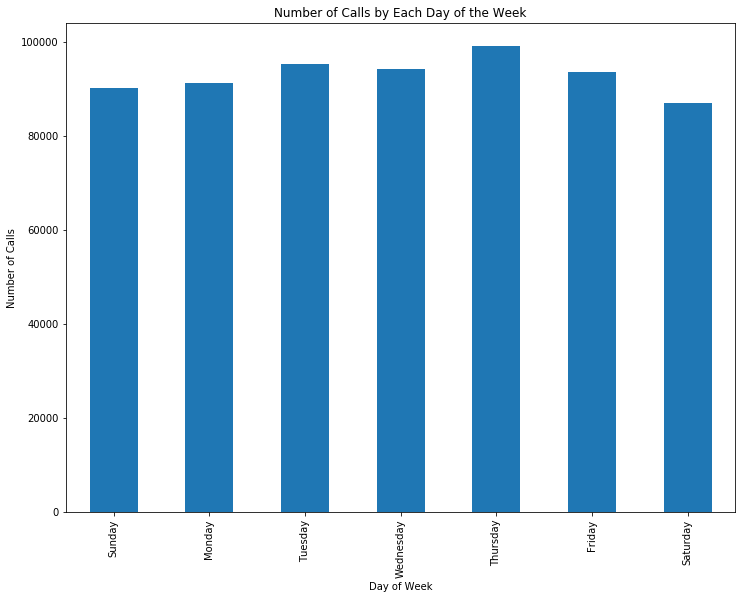

In [320]:
### BEGIN SOLUTION
ax=calls['DAY_OF_WEEK'].value_counts()[days].plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('Number of Calls')
ax.set_xlabel('Day of Week')
ax.set_title('Number of Calls by Each Day of the Week')
### END SOLUTION

## 3.5 What Day of the Week is more calls?

Is it true that weekdays generally have slightly more calls than Saturday or Sunday? What can you say about the difference?

##### BEGIN SOLUTION
It is true from the bar plot that weekdays generally have slightly more calls than weekends, but it may not be significant. The difference is small from the graph.

##### END SOLUTION

We can break down into some particular types of events to see their distribution. For example, let's make a bar plot for the OFNS_DESC "HARRASSMENT 2". Which day is the peak for "HARRASSMENT 2"?

This time, use `seaborn` to create a vertical bar plot of the number of total noise violations reported on each day of the week, again ordered by the days of the week starting with Sunday. Do not use `pandas` to plot.

**Hint:** *If you're stuck, use the code for the seaborn plot in above question as a starting point.*

In [321]:
### BEGIN SOLUTION
ax=sns.countplot(data=calls[calls['OFNS_DESC']=='HARRASSMENT 2'],x='DAY_OF_WEEK',order=days)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('Number of HARRASSMENT 2 Calls')
ax.set_xlabel('Day of Week')
ax.set_title('Number of HARRASSMENT 2 Calls by Each Day of the Week')
#Thursday is the peak for HARRASSMENT 2.

### END SOLUTION

Text(0.5, 1.0, 'Number of HARRASSMENT 2 Calls by Each Day of the Week')

### 3.6 

Do you see anything interesting about the distribution of HARRASSMENT 2 calls over a week? Type a short answer below.
##### BEGIN SOLUTION
HARRASSMENT 2 calls is increase from Sunday to Thursday to a peak and have a significant drop on Friday and Sturday.
Thursday is the peak for HARRASSMENT 2.
Friday and Sturday have the least HARRASSMENT 2 calls
##### END SOLUTION

### 3.7 More Plots

Let's look at a similar distribution but for a crime we have much more calls data about. In the cell below, create the same plot as you did in previous questions, but now looking at instances of the OFNS_DESC "BURGLARY" (instead of "HARRASSMENT 2"). Use either `pandas` or `seaborn` plotting as you desire.

In [322]:
### BEGIN SOLUTION
ax=sns.countplot(data=calls[calls['OFNS_DESC']=='BURGLARY'],x='DAY_OF_WEEK',order=days)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('Number of BURGLARY Calls')
ax.set_xlabel('Day of Week')
ax.set_title('Number of BURGLARY Calls by Each Day of the Week')

### END SOLUTION



Text(0.5, 1.0, 'Number of BURGLARY Calls by Each Day of the Week')

### 3.8 time of events

Now let's look at the CMPLNT_TO_TM column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `Hour` in the `calls` dataframe. You should save the hour as an `int`. Then plot the frequency of each hour in the table (i.e., `value_counts()`) sorted by the hour of the day (i.e., `sort_index()`).

You will want to look into how to use:

* [Series.str.slice](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.slice.html#pandas.Series.str.slice) to select the substring.
* [Series.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) to change the type.

**Hint:** *The `str` helper member of a series can be used to grab substrings.  For example, `calls["CMPLNT_TO_TM"].str.slice(3,5)` returns the minute of each hour of the `CMPLNT_TO_TM`.*

In [323]:
### BEGIN SOLUTION
clean=calls['CMPLNT_TO_TM'].dropna()
calls['Hour']=clean.str.slice(0,2)
calls=calls.dropna(subset=['Hour'])
calls['Hour']=calls['Hour'].astype('int')
calls['OFNS_DESC']=calls['OFNS_DESC'].astype(str)
ax=calls['Hour'].value_counts().sort_index().plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls For Each Day of the Week")

### END SOLUTION

Text(0.5, 1.0, 'Number of Calls For Each Day of the Week')

Create a pandas bar plot showing the number of BURGLARY crimes committed at each hour of the day. Use the labels
* ax.set_xlabel("Hour of the Day")
* ax.set_ylabel("Number of Calls")
* ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23')]

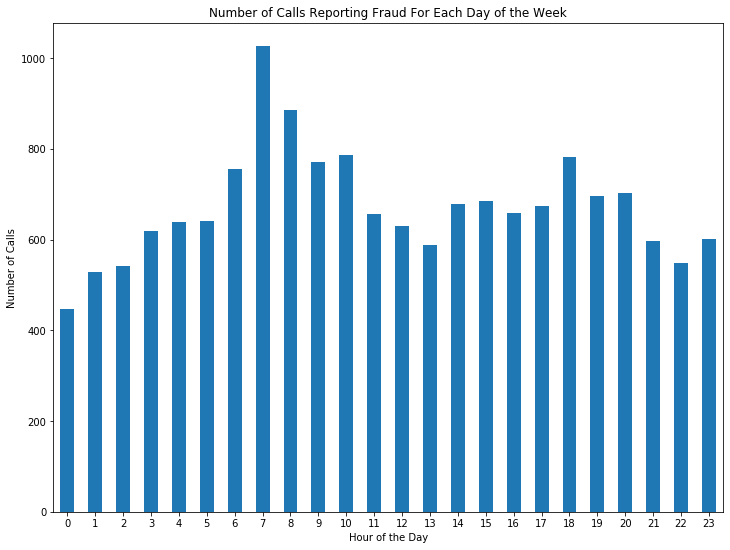

In [324]:
### BEGIN SOLUTION
ax=calls[calls['OFNS_DESC']=='BURGLARY']['Hour'].value_counts().sort_index().plot(kind='bar')
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week")
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

### END SOLUTION

### 3.9 More plots

In the cell below, create a seaborn plot of the same data. Again, make sure you provide axes labels and a title for your plot.

In [325]:
### BEGIN SOLUTION
ax=sns.countplot(calls[calls['OFNS_DESC']=='BURGLARY']['Hour'])
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week")
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

### END SOLUTION

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23')]

### 3.8 Spike in burglary?

According to your plots, is there a spike in calls reporting BURGLARY at any particular time? If so, Do you trust that this spike is legitimate, or could there be an issue with our data? Explain your reasoning in 1-2 sentences below.

#### BEGIN SOLUTION
There is a spike in calls reporting Burglary at 7 o'clock from the plot. However, this is only 1/10 of the total data. Considering we do not know if the first 1/10 of the data is random sampling from all 6.5M datas. Therefore we cannot say this spike is legitimate.

#### END SOLUTION

In the cell below, we generate a boxplot which examines the hour of day of each crime broken down by the `OFNS_DESC` value.  To construct this plot we used the [DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) documentation.

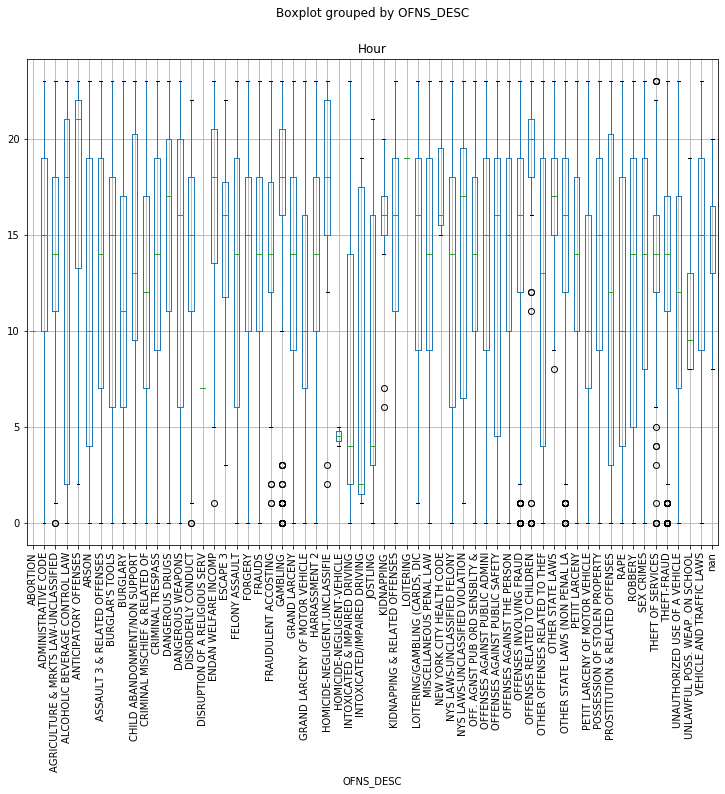

In [326]:
calls.boxplot(column="Hour", by='OFNS_DESC', rot=90);

While the pandas boxplot is informative, we can use seaborn to create a more visually-appealing plot. Using seaborn, regenerate a better box plot. See either the textbook (https://www.textbook.ds100.org/ch/06/viz_quantitative.html) or the [seaborn boxplot documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

Looking at your plot, which crime type appears to have the largest interquartile range? Put your results into `answer` as a string.

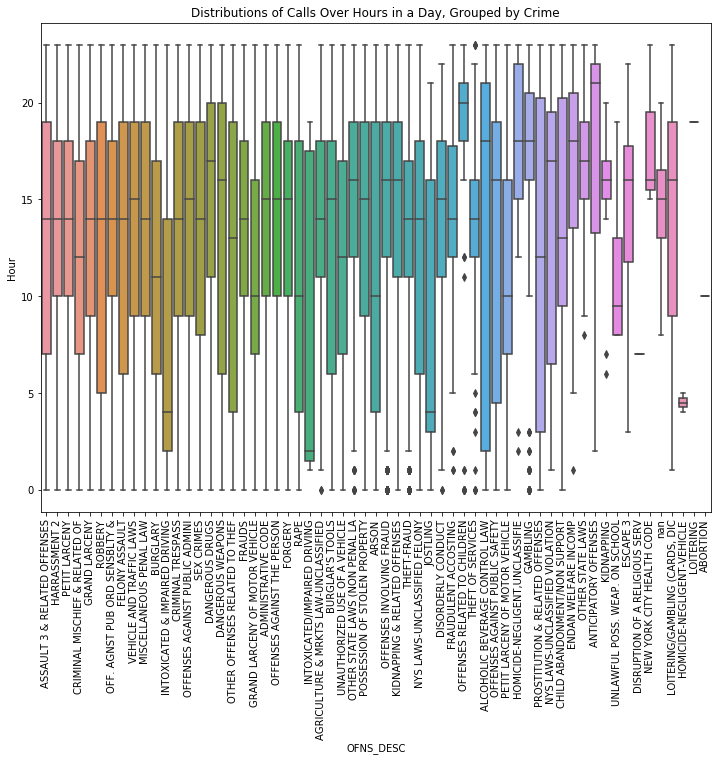

In [327]:
# Todo: Make a boxplot with seaborn
### BEGIN SOLUTION
ax = sns.boxplot(y='Hour',x='OFNS_DESC',data=calls)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Distributions of Calls Over Hours in a Day, Grouped by Crime");
answer = "ALCOHOLIC BEVERAGE CONTROL LAW"
### END SOLUTION

### 3.9 - Visualization of crimes on a Map of NYC
finally we attempt to visualize the crimes committed in NYC on a Map. First we need to installing some mapping software. run the cell below to install folium package for mapping software.

In [328]:
!pip install --upgrade folium

Requirement already up-to-date: folium in /anaconda3/lib/python3.7/site-packages (0.10.0)


In [329]:
### Plot the maps for BURGLARY in NYC
### if it takes too much time or map does not show up, try plotting a subset of the data set of for a specific crime

### BEGIN SOLUTION
import folium
import folium.plugins
B_df=calls.loc[calls['OFNS_DESC']=='BURGLARY']
NY_coordinates=(40.7128, -74.0060)
maps=folium.Map(location = NY_coordinates,zoom_start=12)
locations=B_df[['Latitude','Longitude']].astype('float').dropna().as_matrix()
heatmap=folium.plugins.HeatMap(locations.tolist(),radius=10)
maps.add_child(heatmap)


### END SOLUTION

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


## Congratulations !!!

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as your_section_your_netID_Lab3.jpynb<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; Lab3 <br>
<b>Warning:</b> Failure to follow directions may result in loss of points.<br>
</div>

Credits: Josh Hug, and Berkeley Data Science Group for their contributions to the original version.